In [1]:
import pandas as pd
import numpy as np

In [2]:
master = pd.read_csv('master.csv')

In [3]:
master.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Data Preprocessing and Visualization

In [4]:
master.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
master = master.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

In [6]:
master.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,HDIForYear,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
len(master.CountryYear.unique())

2321

In [8]:
master = master.drop('HDIForYear', axis=1)

In [9]:
master.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

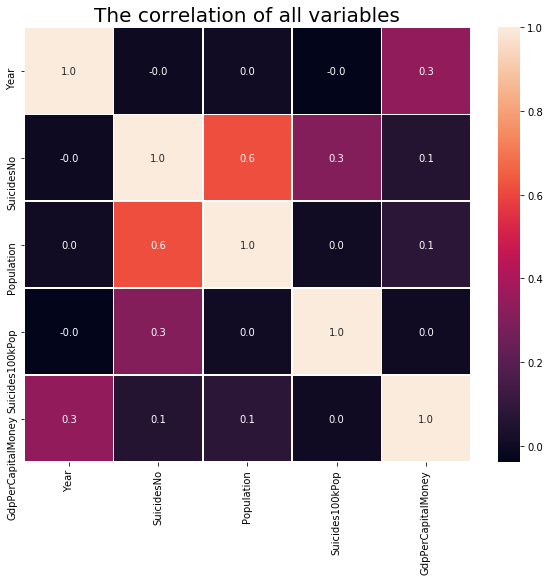

In [11]:
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(master.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("The correlation of all variables",size=20)           
plt.show()

In [12]:
df = master.drop(['Population','Country','Year'], axis=1)
df.head()

,Gender,Age,SuicidesNo,Suicides100kPop,CountryYear,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,male,15-24 years,21,6.71,Albania1987,"2,156,624,900",796,Generation X
1,male,35-54 years,16,5.19,Albania1987,"2,156,624,900",796,Silent
2,female,15-24 years,14,4.83,Albania1987,"2,156,624,900",796,Generation X
3,male,75+ years,1,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,3.28,Albania1987,"2,156,624,900",796,Boomers


In [13]:
df1 = df.copy()

In [14]:
for col in ['Age','Gender','CountryYear','Generation']:
    df1[col] = df1[col].astype('category')
#df1[['Age','Gender','CountryYear','Generation']] = df1[['Age','Gender','CountryYear','Generation']].astype('category')

In [15]:
df1.head()

,Gender,Age,SuicidesNo,Suicides100kPop,CountryYear,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,male,15-24 years,21,6.71,Albania1987,"2,156,624,900",796,Generation X
1,male,35-54 years,16,5.19,Albania1987,"2,156,624,900",796,Silent
2,female,15-24 years,14,4.83,Albania1987,"2,156,624,900",796,Generation X
3,male,75+ years,1,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,3.28,Albania1987,"2,156,624,900",796,Boomers


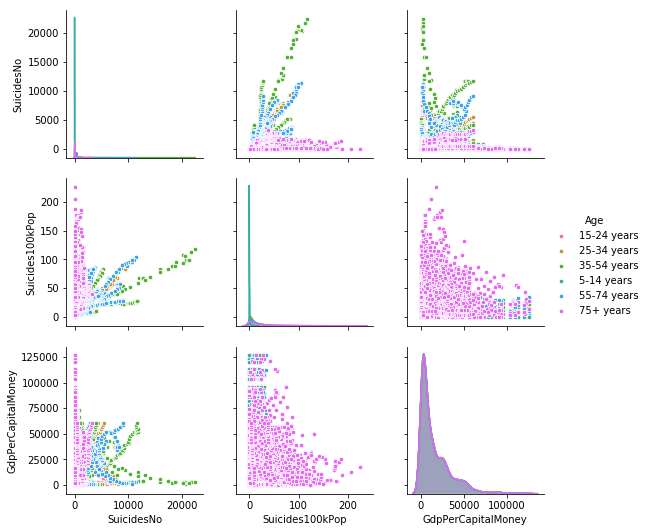

In [16]:
pairplot = sns.pairplot(df1, hue='Age', palette="husl", plot_kws={"s": 20})

In [17]:
Age = master.groupby(["Age"])['Population'].aggregate(np.sum)
Age

Age
15-24 years     8642946896
25-34 years     8438103587
35-54 years    14375888123
5-14 years      8398693237
55-74 years     8803245340
75+ years       2663281253
Name: Population, dtype: int64

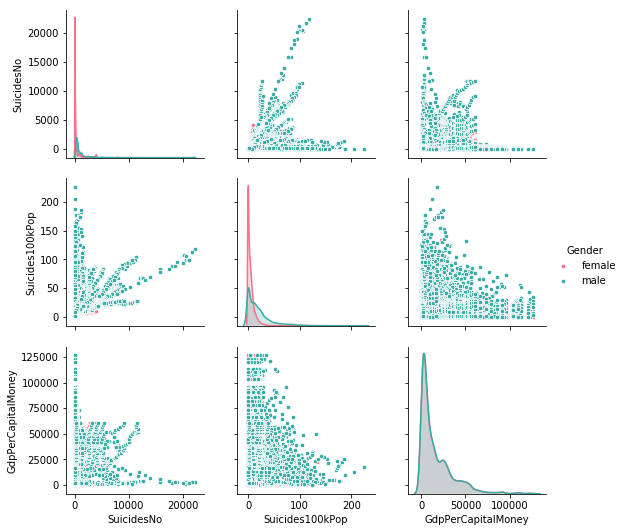

In [18]:
pairplot1 = sns.pairplot(df1, hue='Gender', palette="husl", plot_kws={"s": 20})

In [19]:
Gender = master.groupby(["Gender"])['Population'].aggregate(np.sum)
Gender

Gender
female    26272781857
male      25049376579
Name: Population, dtype: int64

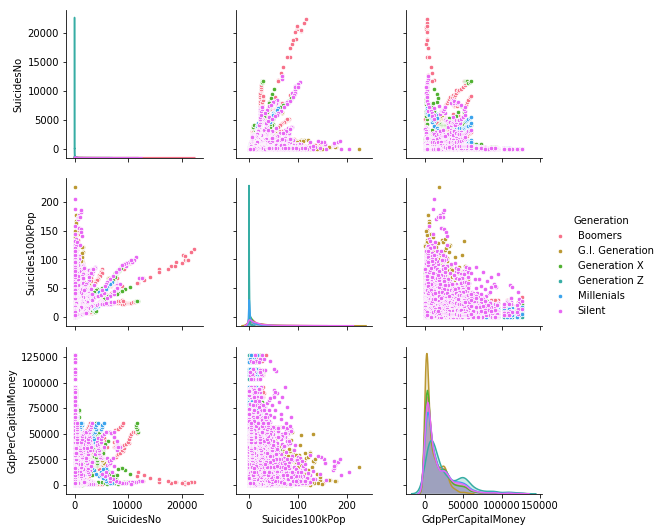

In [20]:
pairplot2 = sns.pairplot(df1, hue='Generation', palette="husl", plot_kws={"s": 20})

In [21]:
Generation = master.groupby(["Generation"])['Population'].aggregate(np.sum)
Generation

Generation
Boomers            13350511729
G.I. Generation     2126202724
Generation X       13472109292
Generation Z        2503541842
Millenials         10649461202
Silent              9220331647
Name: Population, dtype: int64

### One-Hot Encoding

In [22]:
df2 = df1.copy()
df2.head()

,Gender,Age,SuicidesNo,Suicides100kPop,CountryYear,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,male,15-24 years,21,6.71,Albania1987,"2,156,624,900",796,Generation X
1,male,35-54 years,16,5.19,Albania1987,"2,156,624,900",796,Silent
2,female,15-24 years,14,4.83,Albania1987,"2,156,624,900",796,Generation X
3,male,75+ years,1,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,3.28,Albania1987,"2,156,624,900",796,Boomers


In [23]:
list(df.Generation.unique())

['Generation X',
 'Silent',
 'G.I. Generation',
 'Boomers',
 'Millenials',
 'Generation Z']

In [24]:
GdpForYearMoney = [0] * df2.shape[0]

for i in range(df2.shape[0]): 
    GdpForYearMoney[i] = int(df2.GdpForYearMoney[i].replace(',',''))

GdpForYearMoney

[2156624900,
 2156624900,
 2156624900,
 2156624900,
 2156624900,
 2156624900,
 2156624900,
 2156624900,
 2156624900,
 2156624900,
 2156624900,
 2156624900,
 2126000000,
 2126000000,
 2126000000,
 2126000000,
 2126000000,
 2126000000,
 2126000000,
 2126000000,
 2126000000,
 2126000000,
 2126000000,
 2126000000,
 2335124988,
 2335124988,
 2335124988,
 2335124988,
 2335124988,
 2335124988,
 2335124988,
 2335124988,
 2335124988,
 2335124988,
 2335124988,
 2335124988,
 709452584,
 709452584,
 709452584,
 709452584,
 709452584,
 709452584,
 709452584,
 709452584,
 709452584,
 709452584,
 709452584,
 709452584,
 1228071038,
 1228071038,
 1228071038,
 1228071038,
 1228071038,
 1228071038,
 1228071038,
 1228071038,
 1228071038,
 1228071038,
 1228071038,
 1228071038,
 1985673798,
 1985673798,
 1985673798,
 1985673798,
 1985673798,
 1985673798,
 1985673798,
 1985673798,
 1985673798,
 1985673798,
 1985673798,
 1985673798,
 2424499009,
 2424499009,
 2424499009,
 2424499009,
 2424499009,
 2424499009

In [25]:
df2['GdpForYearMoney'] = GdpForYearMoney

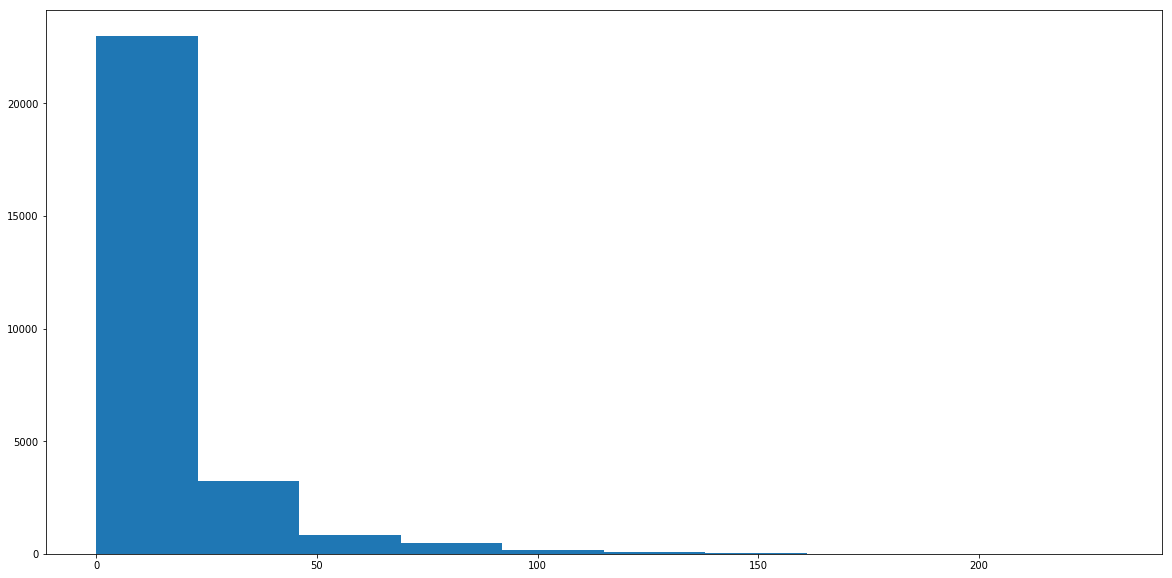

In [26]:
plt.figure(figsize=(20,10))
plt.hist(df2.Suicides100kPop, bins=10, range=(0, 230))
plt.show()

In [27]:
# 5 bins: 0-10, 10-50, 50-100, 100-200, 200+
df2.loc[df2['Suicides100kPop'] == 0, 'label'] = '0 Zero Suicide Rate'
df2.loc[(df2['Suicides100kPop'] > 0) & (df2['Suicides100kPop'] <= 10), 'label'] = '1 Low Suicide Rate'
df2.loc[(df2['Suicides100kPop'] > 10) & (df2['Suicides100kPop'] <= 50), 'label']   = '2 Medium Suicide Rate'
df2.loc[(df2['Suicides100kPop'] > 50) & (df2['Suicides100kPop'] <= 100), 'label']   = '3 High Suicide Rate'
df2.loc[(df2['Suicides100kPop'] > 100), 'label']  = '4 Very High Suicide Rate'

In [28]:
df2[['label', 'Suicides100kPop']].groupby(['label'], as_index=False).count()

,label,Suicides100kPop
0,0 Zero Suicide Rate,4281
1,1 Low Suicide Rate,13077
2,2 Medium Suicide Rate,9054
3,3 High Suicide Rate,1222
4,4 Very High Suicide Rate,186


In [29]:
df2.head()

,Gender,Age,SuicidesNo,Suicides100kPop,CountryYear,GdpForYearMoney,GdpPerCapitalMoney,Generation,label
0,male,15-24 years,21,6.71,Albania1987,2156624900,796,Generation X,1 Low Suicide Rate
1,male,35-54 years,16,5.19,Albania1987,2156624900,796,Silent,1 Low Suicide Rate
2,female,15-24 years,14,4.83,Albania1987,2156624900,796,Generation X,1 Low Suicide Rate
3,male,75+ years,1,4.59,Albania1987,2156624900,796,G.I. Generation,1 Low Suicide Rate
4,male,25-34 years,9,3.28,Albania1987,2156624900,796,Boomers,1 Low Suicide Rate


In [30]:
gender_dummies = pd.get_dummies(df2['Gender'], prefix = 'Gender')
age_dummies = pd.get_dummies(df2['Age'], prefix = 'Age')
cy_dummies = pd.get_dummies(df2['CountryYear'], prefix = 'CountryYear')
generation_dummies = pd.get_dummies(df2['Generation'], prefix = 'Generation')

In [31]:
new = df2.drop(columns = ['Gender','Age','CountryYear','Generation'])
new1 = new.join(gender_dummies)
new1 = new1.join(age_dummies)
new1 = new1.join(cy_dummies)
new1 = new1.join(generation_dummies)

In [32]:
new1['label'] = new1['label'].astype('category')

In [33]:
new1.head()

,SuicidesNo,Suicides100kPop,GdpForYearMoney,GdpPerCapitalMoney,label,Gender_female,Gender_male,Age_15-24 years,Age_25-34 years,Age_35-54 years,...,CountryYear_Uzbekistan2011,CountryYear_Uzbekistan2012,CountryYear_Uzbekistan2013,CountryYear_Uzbekistan2014,Generation_Boomers,Generation_G.I. Generation,Generation_Generation X,Generation_Generation Z,Generation_Millenials,Generation_Silent
0,21,6.71,2156624900,796,1 Low Suicide Rate,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16,5.19,2156624900,796,1 Low Suicide Rate,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,14,4.83,2156624900,796,1 Low Suicide Rate,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,4.59,2156624900,796,1 Low Suicide Rate,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9,3.28,2156624900,796,1 Low Suicide Rate,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
new1.shape

(27820, 2340)

In [35]:
new1.dtypes

SuicidesNo                       int64
Suicides100kPop                float64
GdpForYearMoney                  int64
GdpPerCapitalMoney               int64
label                         category
Gender_female                    uint8
Gender_male                      uint8
Age_15-24 years                  uint8
Age_25-34 years                  uint8
Age_35-54 years                  uint8
Age_5-14 years                   uint8
Age_55-74 years                  uint8
Age_75+ years                    uint8
CountryYear_Albania1987          uint8
CountryYear_Albania1988          uint8
CountryYear_Albania1989          uint8
CountryYear_Albania1992          uint8
CountryYear_Albania1993          uint8
CountryYear_Albania1994          uint8
CountryYear_Albania1995          uint8
CountryYear_Albania1996          uint8
CountryYear_Albania1997          uint8
CountryYear_Albania1998          uint8
CountryYear_Albania1999          uint8
CountryYear_Albania2000          uint8
CountryYear_Albania2001  

In [36]:
new2 = new1.drop(['Suicides100kPop','label'], axis=1)

In [37]:
new2 = new2.astype('int')
new2.head()

,SuicidesNo,GdpForYearMoney,GdpPerCapitalMoney,Gender_female,Gender_male,Age_15-24 years,Age_25-34 years,Age_35-54 years,Age_5-14 years,Age_55-74 years,...,CountryYear_Uzbekistan2011,CountryYear_Uzbekistan2012,CountryYear_Uzbekistan2013,CountryYear_Uzbekistan2014,Generation_Boomers,Generation_G.I. Generation,Generation_Generation X,Generation_Generation Z,Generation_Millenials,Generation_Silent
0,21,-2138342396,796,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16,-2138342396,796,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14,-2138342396,796,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,-2138342396,796,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9,-2138342396,796,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
new2.shape

(27820, 2338)

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
new3 = sc.fit_transform(new2)
lda = LDA(n_components=4)  
new4 = lda.fit_transform(new3, new1['label'])

C:\Users\lisha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [40]:
new4 = pd.DataFrame(new4)

In [41]:
new4.shape

(27820, 4)

In [42]:
new5 = pd.concat([new4,new1.label], axis=1)
new5.head()

,0,1,2,3,label
0,-0.680534,-0.726144,0.231132,-0.122157,1 Low Suicide Rate
1,-0.193199,-0.434897,0.030727,-0.215889,1 Low Suicide Rate
2,-2.095568,-1.748157,0.723318,-0.106877,1 Low Suicide Rate
3,-0.164421,0.894469,1.241217,0.516121,1 Low Suicide Rate
4,-0.391994,-0.552719,0.177102,-0.194175,1 Low Suicide Rate


In [43]:
train = new5[:20000]
test = new5[20000:]

In [44]:
train_x = train.drop(['label'], axis=1)
train_y = train['label']

In [45]:
test_x = test.drop(['label'], axis=1)
test_y = test['label']

## Modeling Techniques 
### Gaussian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [47]:
gnb = GaussianNB()
y_pred = gnb.fit(train_x, train_y).predict(test_x)

In [48]:
print("Number of mislabeled points out of a total %d points : %d" 
      % (test_x.shape[0],(test_y != y_pred).sum()))

Number of mislabeled points out of a total 7820 points : 1442


In [49]:
accuracy_score(test_y, y_pred, normalize = True)

0.8156010230179028

In [50]:
print(metrics.classification_report(test_y, y_pred))

                          precision    recall  f1-score   support

     0 Zero Suicide Rate       0.75      0.75      0.75      1021
      1 Low Suicide Rate       0.88      0.87      0.87      3504
   2 Medium Suicide Rate       0.81      0.80      0.81      2794
     3 High Suicide Rate       0.56      0.66      0.61       440
4 Very High Suicide Rate       0.66      0.38      0.48        61

             avg / total       0.82      0.82      0.82      7820



In [51]:
confusion_df = pd.DataFrame(confusion_matrix(test_y, y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1,2,3,4]],
             index = ["Class " + str(class_name) for class_name in [0,1,2,3,4]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Class 0                770                217                 32   
Class 1                 83               3056                355   
Class 2                152                213               2240   
Class 3                 17                  0                129   
Class 4                  3                  0                  4   

         Predicted Class 3  Predicted Class 4  
Class 0                  2                  0  
Class 1                 10                  0  
Class 2                182                  7  
Class 3                289                  5  
Class 4                 31                 23  


#### TP – True Positives / FP – False Positives / FN – False Negatives

#### Precision – Accuracy of positive predictions /  Precision = TP/(TP + FP)
#### Recall (aka sensitivity or true positive rate) — Fraction of positives That were correctly identified /  Recall = TP/(TP+FN)

### Multinomial Naive Bayes

In [52]:
mnb = MultinomialNB()
y_pred = mnb.fit(train_x, train_y).predict(test_x)

ValueError: Input X must be non-negative

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" 
      % (test_x.shape[0],(test_y != y_pred).sum()))

In [53]:
accuracy_score(test_y, y_pred, normalize = True)

0.8156010230179028

In [54]:
print(metrics.classification_report(test_y, y_pred))

                          precision    recall  f1-score   support

     0 Zero Suicide Rate       0.75      0.75      0.75      1021
      1 Low Suicide Rate       0.88      0.87      0.87      3504
   2 Medium Suicide Rate       0.81      0.80      0.81      2794
     3 High Suicide Rate       0.56      0.66      0.61       440
4 Very High Suicide Rate       0.66      0.38      0.48        61

             avg / total       0.82      0.82      0.82      7820



In [55]:
confusion_df = pd.DataFrame(confusion_matrix(test_y, y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1,2,3,4]],
             index = ["Class " + str(class_name) for class_name in [0,1,2,3,4]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Class 0                770                217                 32   
Class 1                 83               3056                355   
Class 2                152                213               2240   
Class 3                 17                  0                129   
Class 4                  3                  0                  4   

         Predicted Class 3  Predicted Class 4  
Class 0                  2                  0  
Class 1                 10                  0  
Class 2                182                  7  
Class 3                289                  5  
Class 4                 31                 23  


### Gaussian Mixture

In [69]:
from sklearn.mixture import GaussianMixture
from sklearn import mixture

In [70]:
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full')
GMM = gmm.fit(train_x, train_y)

In [71]:
y_pred = GMM.predict(test_x)
y_pred

array([4, 4, 1, ..., 4, 4, 4], dtype=int64)

In [72]:
y = [x[0] for x in test_y]
y = pd.Series(y)
y = y.astype('int')
type(y[0])

numpy.int32

In [73]:
accuracy_score(y, y_pred, normalize = True)

0.2877237851662404

In [74]:
print(metrics.classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.71      0.80      0.75      1021
          1       0.43      0.25      0.32      3504
          2       0.44      0.13      0.21      2794
          3       0.26      0.43      0.32       440
          4       0.00      0.00      0.00        61

avg / total       0.46      0.29      0.33      7820



In [75]:
confusion_df = pd.DataFrame(confusion_matrix(y, y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1,2,3,4]],
             index = ["Class " + str(class_name) for class_name in [0,1,2,3,4]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Class 0                814                 56                 93   
Class 1                152                874                195   
Class 2                169                988                374   
Class 3                  8                116                128   
Class 4                  0                  0                 61   

         Predicted Class 3  Predicted Class 4  
Class 0                  7                 51  
Class 1                235               2048  
Class 2                304                959  
Class 3                188                  0  
Class 4                  0                  0  


In [76]:
import plotly.plotly as py
import plotly.graph_objs as go

import itertools
import numpy as np
from scipy import linalg
import math

from sklearn import mixture

In [77]:
color_iter = itertools.cycle(['navy', 'cyan', 'cornflowerblue', 'gold',
                              'orange'])

def plot_results(X, Y_, means, covariances,  title):
    data = []
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        trace = go.Scatter(x=X[Y_ == i, 0], y=X[Y_ == i, 1], 
                           mode='markers',
                           marker=dict(color=color))
        data.append(trace)
        # Plot an ellipse to show the Gaussian component
        a =  v[1]
        b =  v[0]
        x_origin = mean[0]
        y_origin = mean[1]
        x_ = [ ]
        y_ = [ ]
    
        for t in range(0,361,10):
            x = a*(math.cos(math.radians(t))) + x_origin
            x_.append(x)
            y = b*(math.sin(math.radians(t))) + y_origin
            y_.append(y)
    
        elle = go.Scatter(x=x_ , y=y_, mode='lines',
                          showlegend=False,
                          line=dict(color=color,
                                   width=2))
        data.append(elle)
       
    layout = go.Layout(title=title, showlegend=False,
                       xaxis=dict(zeroline=False, showgrid=False),
                       yaxis=dict(zeroline=False, showgrid=False),)
    fig = go.Figure(data=data, layout=layout)
    
    return fig

In [78]:
train_x_array=np.array(train_x)
test_x_array=np.array(test_x)

In [82]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(train_x_array)
fig = plot_results(train_x_array, gmm.predict(train_x_array), gmm.means_, gmm.covariances_,'Gaussian Mixture')

In [83]:

#from plotly.plotly import iplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
iplot(fig)

In [64]:
n_classes=['0 Zero Suicide Rate','1 Low Suicide Rate','2 Medium Suicide Rate','3 High Suicide Rate','4 Very High Suicide Rate']

In [65]:
train_y=pd.DataFrame(train_y)

train_y

,label
0,1 Low Suicide Rate
1,1 Low Suicide Rate
2,1 Low Suicide Rate
3,1 Low Suicide Rate
4,1 Low Suicide Rate
5,1 Low Suicide Rate
6,1 Low Suicide Rate
7,1 Low Suicide Rate
8,1 Low Suicide Rate
9,0 Zero Suicide Rate


In [68]:
# 5 bins: 0-10, 10-50, 50-100, 100-200, 200+
train_y1=train_y.copy()
train_y1.loc[train_y['label'] =='0 Zero Suicide Rate', 'label'] = 1
train_y1.loc[train_y['label'] =='1 Low Suicide Rate', 'label'] = 2
train_y1.loc[train_y['label'] =='2 Low Suicide Rate', 'label'] = 3
train_y1.loc[train_y['label'] =='3 High Suicide Rate', 'label'] = 4
train_y1.loc[train_y['label'] =='4 Very High Suicide Rate', 'label'] = 5

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [96]:
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    print(name)
    estimator.means_init = np.array([train_x[train_y == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(train_x)
    plt.figure(figsize=(15, 10))
    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    
    
    for n, color in enumerate(colors):
        data = train_x[train_y == n]
        data = data[random.sample(range(len(data)), 20)]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color)
        
    # Plot the test data with crosses
    
    for n, color in enumerate(colors):
        data = test_x[test_y == n for n in range(n_classes)]
        data = data[random.sample(range(len(data)), 20)]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)
    
    y_train_pred = estimator.predict(train_x)
    train_accuracy = np.mean(y_train_pred.ravel() == train_y.ravel()) * 100
    print('train_accuracy is:%s'%train_accuracy)
    plt.text(0.01, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    print('test_accuracy is: %s'%test_accuracy)
    plt.text(0.01, 0.8, 'Test accuracy: %.1f' % test_accuracy,
            transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    
plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

SyntaxError: invalid syntax (<ipython-input-96-760adb405b76>, line 23)

### Hidden Markov Models

In [133]:
from hmmlearn import hmm

In [134]:
hmm = hmm.GaussianHMM(n_components=5, covariance_type="tied")
HMM = hmm.fit(new4)

In [135]:
y_pred = HMM.predict(new4)
y_pred

array([1, 1, 1, ..., 4, 4, 4])

In [136]:
y = [x[0] for x in new1['label']]
y = pd.Series(y)
y = y.astype('int')
type(y[0])

numpy.int64

In [137]:
accuracy_score(y, y_pred, normalize = True)

0.24245147375988496

In [138]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.06      0.03      0.03      4281
           1       0.79      0.45      0.58     13077
           2       0.38      0.08      0.13      9054
           3       0.01      0.02      0.01      1222
           4       0.00      0.00      0.00       186

   micro avg       0.24      0.24      0.24     27820
   macro avg       0.25      0.11      0.15     27820
weighted avg       0.50      0.24      0.32     27820



In [139]:
confusion_df = pd.DataFrame(confusion_matrix(y, y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1,2,3,4]],
             index = ["Class " + str(class_name) for class_name in [0,1,2,3,4]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Class 0                108                362                 38   
Class 1                533               5921                557   
Class 2                882               1103                691   
Class 3                220                 67                547   
Class 4                184                  0                  2   

         Predicted Class 3  Predicted Class 4  
Class 0               2910                863  
Class 1                410               5656  
Class 2                461               5917  
Class 3                 25                363  
Class 4                  0                  0  


### Baysian Ridge Regression and Linear Regression

In [140]:
from sklearn.linear_model import BayesianRidge

In [149]:
n1 = new1[:20000]
n2 = new1[20000:]

In [146]:
clf = BayesianRidge(compute_score=True)
BRR = clf.fit(train_x, n1['Suicides100kPop'])

In [147]:
y_pred = BRR.predict(test_x)

In [148]:
from sklearn.metrics import mean_squared_error

In [150]:
mean_squared_error(n2['Suicides100kPop'], y_pred)

183.82412546020905

In [151]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
OLS = ols.fit(train_x, n1['Suicides100kPop'])

In [152]:
y_pred = OLS.predict(test_x)

In [153]:
mean_squared_error(n2['Suicides100kPop'], y_pred)

183.817862986394

### Linear Discriminant Analysis

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA = clf.fit(train_x, train_y)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [87]:
y_pred = LDA.predict(test_x)
y_pred

array(['1 Low Suicide Rate', '1 Low Suicide Rate', '1 Low Suicide Rate',
       ..., '1 Low Suicide Rate', '1 Low Suicide Rate',
       '1 Low Suicide Rate'], dtype='<U24')

In [88]:
accuracy_score(test_y, y_pred, normalize = True)

0.65153452685422

In [89]:
print(metrics.classification_report(test_y, y_pred))

                          precision    recall  f1-score   support

     0 Zero Suicide Rate       0.00      0.00      0.00      1021
      1 Low Suicide Rate       0.65      0.86      0.74      3504
   2 Medium Suicide Rate       0.65      0.71      0.68      2794
     3 High Suicide Rate       0.58      0.17      0.27       440
4 Very High Suicide Rate       0.00      0.00      0.00        61

               micro avg       0.65      0.65      0.65      7820
               macro avg       0.38      0.35      0.34      7820
            weighted avg       0.56      0.65      0.59      7820



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
